In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [11]:
df = pd.read_csv(f'../data_files/7.0.2/test.csv', index_col=[0])
#model = tf.keras.models.load_model('../neural_network/models/v7.0.2')

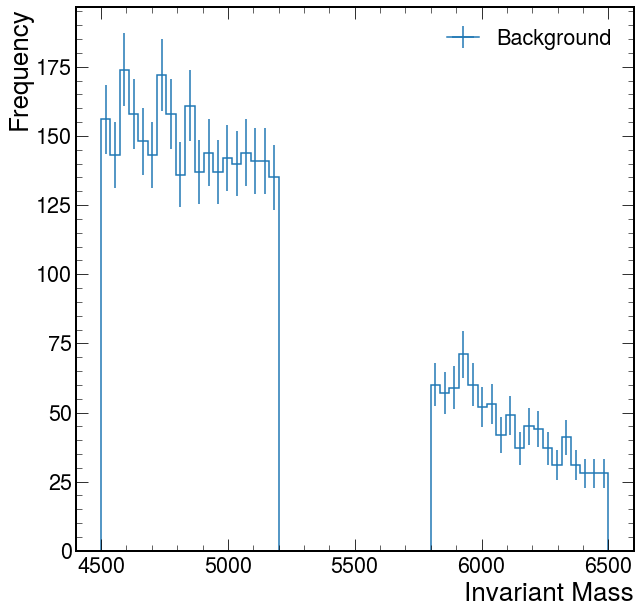

In [21]:
bins = np.concatenate((np.linspace(4500, 5200, 20), np.linspace(5800, 6500, 20)))
h, _ = np.histogram(df['Lb_M'][df['IsSimulated']==False], bins=bins)
h1, _ = np.histogram(df['Lb_M'][df['IsSimulated']==True], bins=np.linspace(4500, 6500, 75))

fig, ax = plt.subplots(1, 1)
hep.histplot(h, bins, ax=ax, label='Background', yerr=np.sqrt(h))
#hep.histplot(h1, np.linspace(4500, 6500, 75), ax=ax, label='Signal', yerr=np.sqrt(h1))
plt.ylabel('Frequency')
plt.xlabel('Invariant Mass')
plt.legend()
plt.savefig('../images/BG_Mass_Dist.png', dpi=800)
plt.show()

In [40]:
predictions = model.predict(df.drop(['Lb_M', 'IsSimulated', 'category'], axis=1)).flatten()

In [44]:
df['pred'] = predictions

In [51]:
df['class'] = np.where(df['pred']>0.5,1,0)

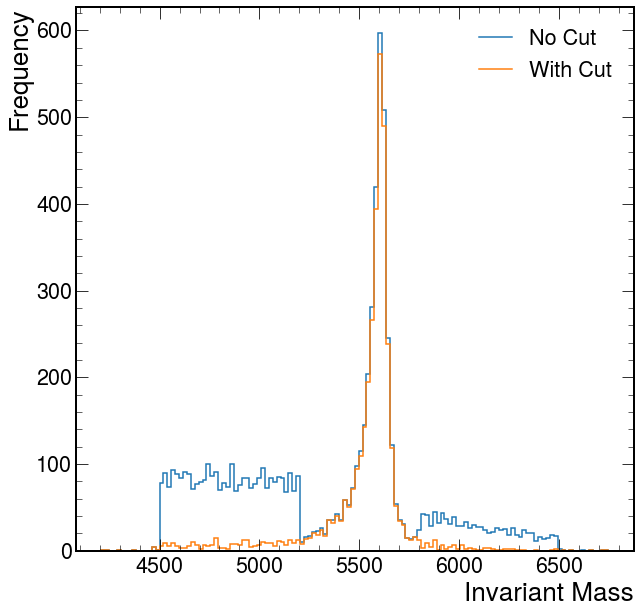

In [52]:
h, bins = np.histogram(df['Lb_M'], bins=130)

cut_df = df[df['class'] == 1]
h2, _ = np.histogram(cut_df['Lb_M'], bins=bins)

fig, ax = plt.subplots(1, 1)
hep.histplot([h, h2], bins, ax=ax, label=['No Cut', 'With Cut'])
plt.ylabel('Frequency')
plt.xlabel('Invariant Mass')
plt.legend()
plt.show()